<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [1]:
student_number = 400101272
Name = 'Mohammad Mahdi'
Last_Name = 'Razmjoo'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch
!pip install torchinfo

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## Importing Libraries

In [4]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [5]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:05<00:00, 5030933.45it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 299038.07it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5537372.65it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5161911.78it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [6]:
num_classes = len(train_set.classes)
input_dim = train_set[0][0].shape[1] * train_set[0][0].shape[2]

print("Number of classes : ",num_classes)
print("Input dimention of the first layer : ",input_dim)

Number of classes :  10
Input dimention of the first layer :  784


In [7]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

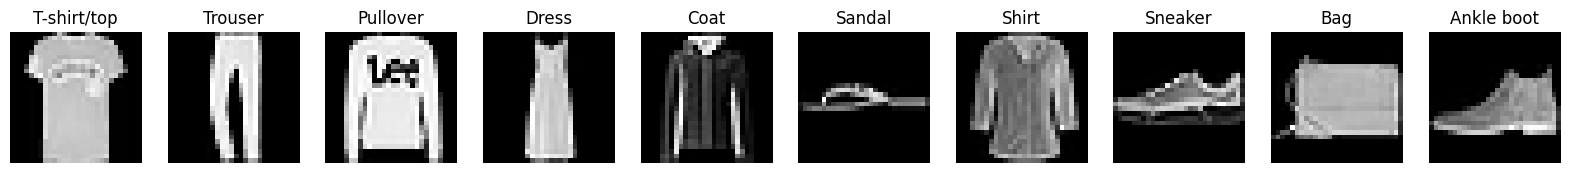

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=len(train_set.classes), figsize=(20, 10))
for i in range(len(train_set.classes)):
    random_index = np.where(test_set.targets == i)[0][0]
    image = test_set[random_index][0].numpy().transpose(1, 2, 0)
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(train_set.classes[i])
    axs[i].axis('off')
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [10]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)
    w.requires_grad = True
    b.requires_grad = True
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [11]:
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)
parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [12]:
def affine_forward(x, w, b):
    return x @ w+b

def relu(x):
    return torch.maximum(x, torch.zeros_like(x))

Function `model` returns output of the whole model for the input `x` using the parameters:

In [14]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    B = x.shape[0]
    x = x.view(B, -1)

    for i in range(num_layers):
        w = parameters[f'w{i}']
        b = parameters[f'b{i}']
        x = affine_forward(x, w, b)
        if i < num_layers - 1:
            x = relu(x)
    output = x
    return output

Implementing cross entropy loss:

In [15]:
def cross_entropy_loss(scores, y):
    n = len(y)
    exp_scores = torch.exp(scores)
    softmax_scores = exp_scores / exp_scores.sum(dim=1, keepdim=True)
    log_probs = torch.log(softmax_scores[range(n), y])
    loss = -log_probs.sum() / n
    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [16]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    with torch.no_grad():
        for param in parameters.values():
            if param.requires_grad:
                param -= learning_rate * param.grad
                param.grad.zero_()

Training functions:

In [17]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    acc = (y_pred == y_true).mean()
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)
        loss = cross_entropy_loss(p, y)
        loss.backward()
        sgd_optimizer(parameters, learning_rate)
        train_loss += loss.item() * x.size(0)
        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc

def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)
        loss = cross_entropy_loss(p, y)
        total_loss += loss.item() * x.size(0)
        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')
    return total_loss, acc

In [18]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [19]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders
    for epoch in range(num_epochs):
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        test_loss, test_acc = validate(test_loader, epoch, "Test")
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy')
    plt.plot(range(num_epochs), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.legend()

    plt.show()

Accuracy of train set: 0.4106
Accuracy of Test set: 0.48991666666666667
Accuracy of train set: 0.44606666666666667
Accuracy of Test set: 0.45158333333333334
Accuracy of train set: 0.5471666666666667
Accuracy of Test set: 0.6051666666666666
Accuracy of train set: 0.6601833333333333
Accuracy of Test set: 0.6789333333333334
Accuracy of train set: 0.7038666666666666
Accuracy of Test set: 0.72545
Accuracy of train set: 0.7381166666666666
Accuracy of Test set: 0.7292666666666666
Accuracy of train set: 0.7617666666666667
Accuracy of Test set: 0.7601333333333333
Accuracy of train set: 0.777
Accuracy of Test set: 0.7828666666666667
Accuracy of train set: 0.7891666666666667
Accuracy of Test set: 0.7910833333333334
Accuracy of train set: 0.7974833333333333
Accuracy of Test set: 0.7938
Accuracy of train set: 0.8065166666666667
Accuracy of Test set: 0.8020166666666667
Accuracy of train set: 0.812
Accuracy of Test set: 0.8047666666666666
Accuracy of train set: 0.81815
Accuracy of Test set: 0.8137333

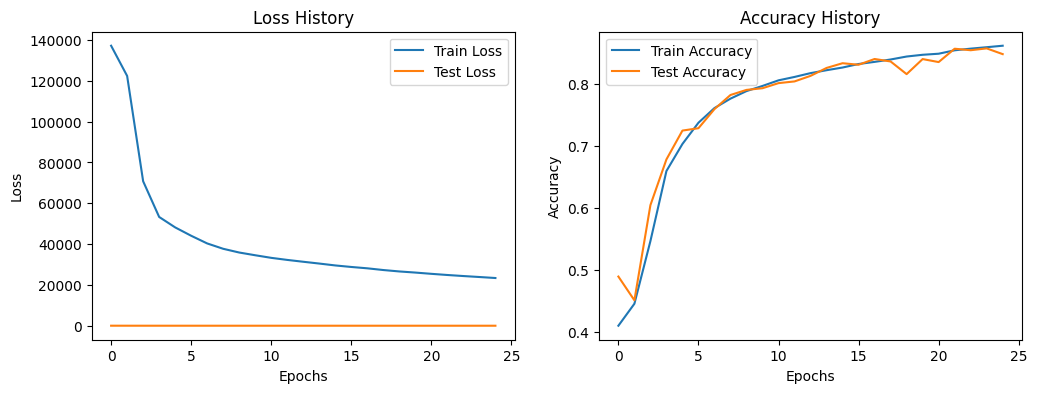

In [20]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [21]:
  print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8488


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

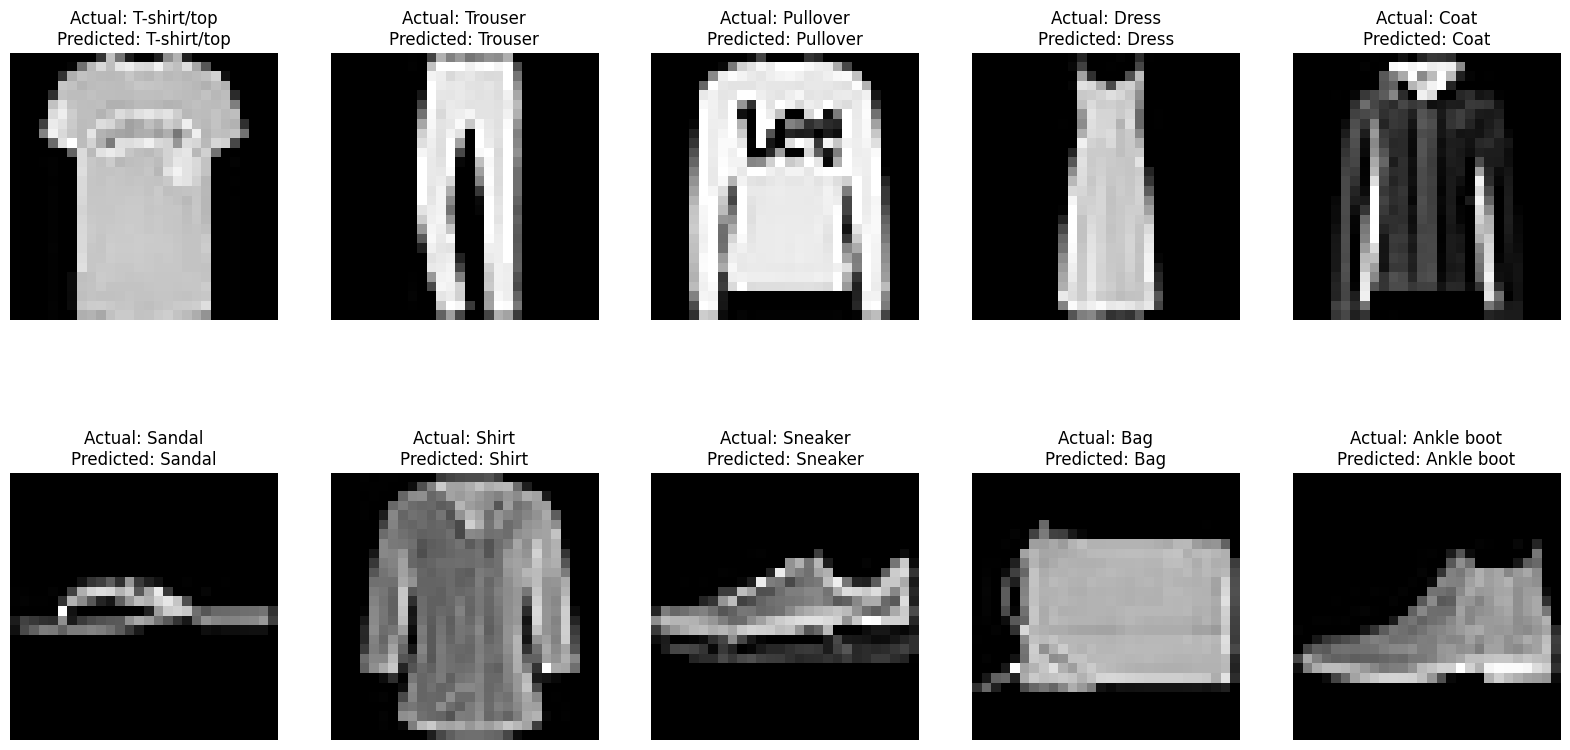

In [22]:
class_images = {}
for i in range(num_classes):
    index = np.where(test_set.targets == i)[0][0]
    class_images[i] = test_set[index][0]
class_images_tensor = torch.stack(list(class_images.values()))
with torch.no_grad():
    class_predictions = model(class_images_tensor.to(device), parameters)
predicted_labels = torch.argmax(class_predictions, dim=1).cpu().numpy()

plt.figure(figsize=(20, 10))
for i in range(num_classes):
    plt.subplot(2, 5, i + 1)
    plt.imshow(class_images[i].permute(1, 2, 0), cmap='gray')
    plt.title(f"Actual: {test_set.classes[i]}\nPredicted: {test_set.classes[predicted_labels[i]]}")
    plt.axis('off')
plt.show()
